In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

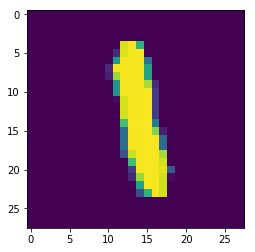

In [7]:
X=x_train[9487].reshape(28,28)
plt.imshow(X)

In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [42]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD
from keras.layers import Input
from keras.layers import concatenate, add
from keras.models import Model

In [34]:
f_1=Conv2D(8,(5,5), padding='same',activation='relu')
pool_1 = MaxPool2D(pool_size=(2, 2))
f_2=Conv2D(16,(5,5), padding='same',activation='relu')
pool_2 = MaxPool2D(pool_size=(2, 2))
f_3=Conv2D(24,(5,5), padding='same',activation='relu')
pool_3 = MaxPool2D(pool_size=(2, 2))
f_4=Conv2D(36,(5,5), padding='same',activation='relu')
pool_4 = MaxPool2D(pool_size=(2, 2))
f_5=Dense(30, activation='relu')
f_5_1=Dense(18,activation='sigmoid')
f_6=Dense(24, activation='relu')
f_7=Dense(10,activation='softmax')

In [45]:
goin=Input(shape=(28,28,1))
h_1=pool_1(f_1(goin))
h_2=pool_2(f_2(h_1))
h_3=pool_3(f_3(h_2))
h_4=Flatten()(pool_4(f_4(h_3)))
h_5_1=f_5(h_4)
h_5_2=f_5_1(h_4)
h_5=concatenate([h_5_1,h_5_2])
h_6=f_6(h_5)
h_7=f_7(h_6)

In [46]:
model=Model(goin,h_7)

In [47]:
model.compile(loss='mse',optimizer=SGD(lr=0.7),metrics=['accuracy'])

In [48]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 8)    208         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 14, 14, 8)    0           conv2d_21[3][0]                  
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 14, 14, 16)   3216        max_pooling2d_17[3][0]           
__________________________________________________________________________________________________
max_poolin

In [49]:
model.fit(x_train,y_train,batch_size=100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 51s 853us/step - loss: 0.0838 - acc: 0.2853
Epoch 2/10
60000/60000 [==============================] - 51s 851us/step - loss: 0.0163 - acc: 0.8906
Epoch 3/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0064 - acc: 0.9587
Epoch 4/10
60000/60000 [==============================] - 48s 804us/step - loss: 0.0046 - acc: 0.9704
Epoch 5/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.0038 - acc: 0.9751
Epoch 6/10
60000/60000 [==============================] - 46s 773us/step - loss: 0.0032 - acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 46s 767us/step - loss: 0.0029 - acc: 0.9812
Epoch 8/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.0025 - acc: 0.9843
Epoch 9/10
60000/60000 [==============================] - 46s 768us/step - loss: 0.0022 - acc: 0.9861
Epoch 10/10
60000/60000 [=========

In [51]:
score = model.evaluate(x_test,y_test)
score[1]

10000/10000 [==============================] - 4s 396us/step


0.9797

In [57]:
print('測試資料的 loss: %f'%(score[0]))
print('測試資料的正確率: %f'%(score[1]))

測試資料的 loss: 0.003076
測試資料的正確率: 0.979700


In [58]:
model.save('0506_practice_1_model_weights.h5')

In [60]:
print('''準確率高達9797！！
灑花！！''')

準確率高達9797！！
灑花！！
